# Data: https://www.kaggle.com/shivam2503/diamonds

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats, sparse
from sklearn.preprocessing import *
from sklearn.linear_model import SGDClassifier, LogisticRegression, LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from imblearn.datasets import make_imbalance

In [15]:
df = pd.read_csv('diamonds.csv')

In [16]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [23]:
for col in df.select_dtypes(exclude='O').columns:
    df[f'{col}_bin'] = pd.qcut(df[col],q=3,labels=[0,1,2])
for col in df.select_dtypes(exclude='O').drop(['carat_bin', 'depth_bin', 'table_bin', 'price_bin', 'x_bin',
       'y_bin', 'z_bin'],axis=1).columns:
    df[f'{col}_bin2'] = pd.cut(df[col],bins=3,labels=[0,1,2])

In [24]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,x_bin,y_bin,z_bin,carat_bin2,depth_bin2,table_bin2,price_bin2,x_bin2,y_bin2,z_bin2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,1,0,0,1,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,1,0,1,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,1,1,0,1,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,0,0,0,0,1,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,0,0,1,0,0,1,0,0


In [25]:
for col in df.select_dtypes(exclude='O').columns:
    df[col]=df[col].astype(float)

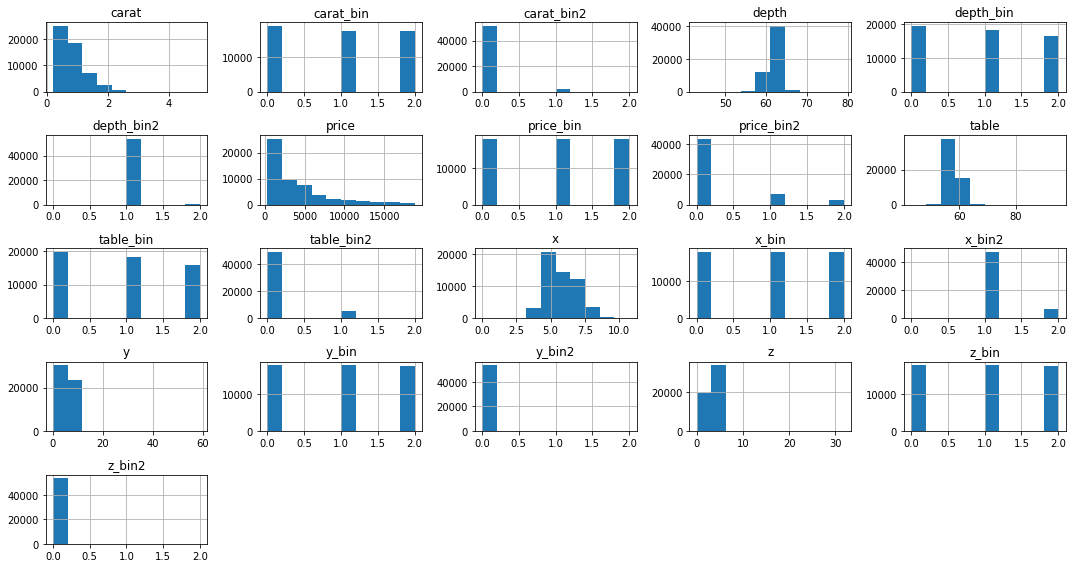

In [26]:
df.hist(figsize=(15,8))
plt.tight_layout()
plt.show()

In [27]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'carat_bin', 'depth_bin', 'table_bin', 'price_bin', 'x_bin',
       'y_bin', 'z_bin', 'carat_bin2', 'depth_bin2', 'table_bin2',
       'price_bin2', 'x_bin2', 'y_bin2', 'z_bin2'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null float64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
carat_bin     53940 non-null float64
depth_bin     53940 non-null float64
table_bin     53940 non-null float64
price_bin     53940 non-null float64
x_bin         53940 non-null float64
y_bin         53940 non-null float64
z_bin         53940 non-null float64
carat_bin2    53940 non-null float64
depth_bin2    53940 non-null float64
table_bin2    53940 non-null float64
price_bin2    53940 non-null float64
x_bin2        53940 non-null float64
y_bin2        53940 non-null float64
z_bin2        53940 non-null float64
dtypes

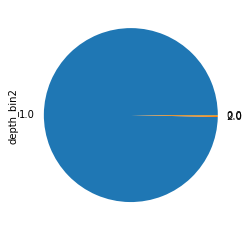

In [29]:
df.depth_bin2.value_counts().plot(kind='pie')

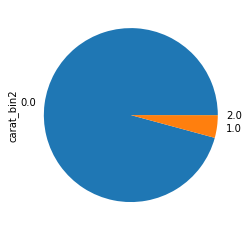

In [30]:
df.carat_bin2.value_counts().plot(kind='pie')

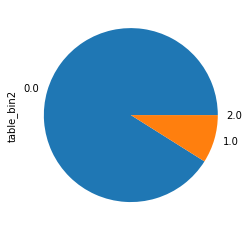

In [31]:
df.table_bin2.value_counts().plot(kind='pie')

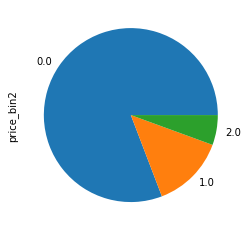

In [32]:
df.price_bin2.value_counts().plot(kind='pie')

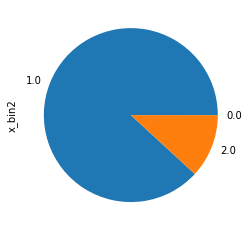

In [34]:
df.x_bin2.value_counts().plot(kind='pie')

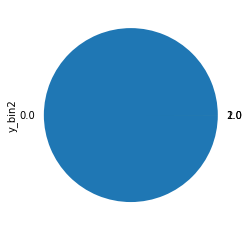

In [35]:
df.y_bin2.value_counts().plot(kind='pie')

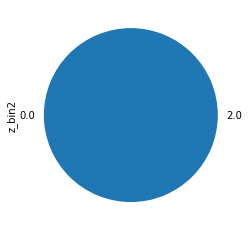

In [36]:
df.z_bin2.value_counts().plot(kind='pie')

# this indicates that we may need to filter outliers and the observations below are not entirely representative of the data

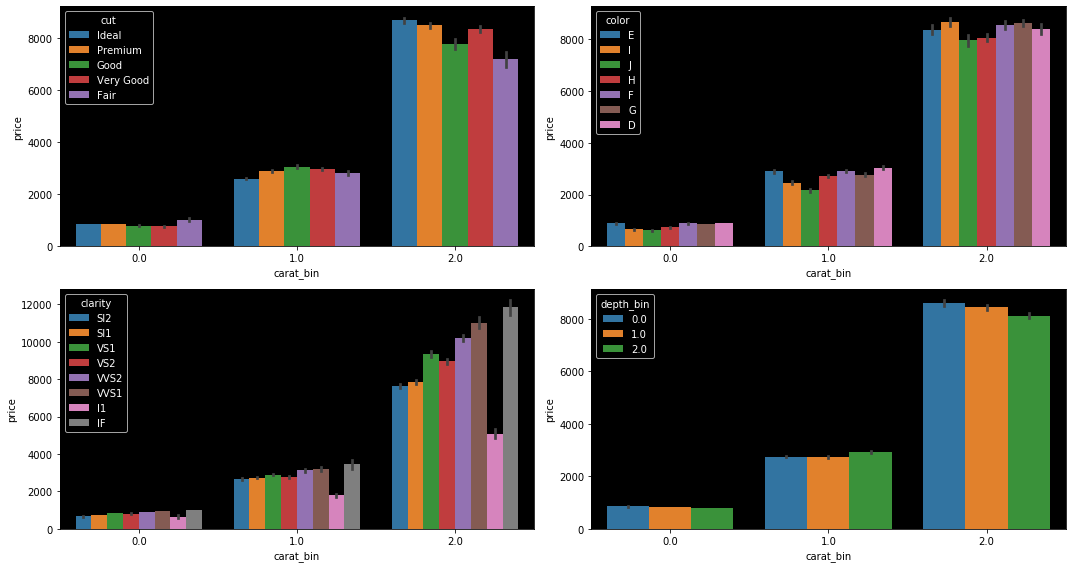

In [19]:
with sns.axes_style({'axes.facecolor':'black','text.color':'white'}):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    sns.barplot(df.carat_bin, df.price, hue=df.cut)
    plt.tight_layout()
    
    plt.subplot(2,2,2)
    sns.barplot(df.carat_bin, df.price, hue=df.color)
    plt.tight_layout()
    
    plt.subplot(2,2,3)
    sns.barplot(df.carat_bin, df.price, hue=df.clarity)
    plt.tight_layout()
    
    plt.subplot(2,2,4)
    sns.barplot(df.carat_bin, df.price, hue=df.depth_bin)
    plt.tight_layout()
    
    plt.show()

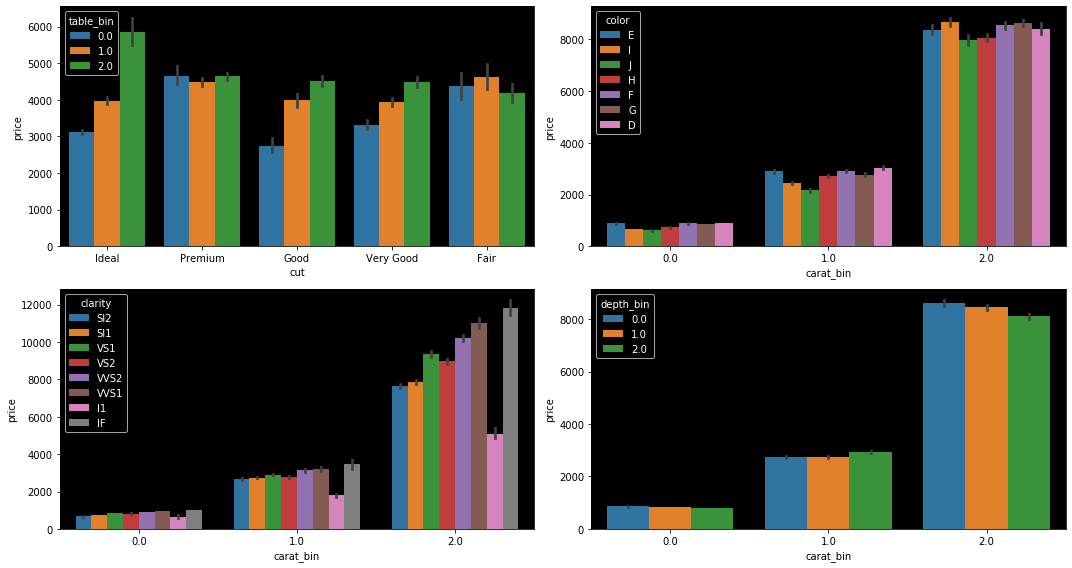

In [21]:
with sns.axes_style({'axes.facecolor':'black','text.color':'white'}):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    sns.barplot(df.cut, df.price, hue=df.table_bin)
    plt.tight_layout()
    
    plt.subplot(2,2,2)
    sns.barplot(df.carat_bin, df.price, hue=df.color)
    plt.tight_layout()
    
    plt.subplot(2,2,3)
    sns.barplot(df.carat_bin, df.price, hue=df.clarity)
    plt.tight_layout()
    
    plt.subplot(2,2,4)
    sns.barplot(df.carat_bin, df.price, hue=df.depth_bin)
    plt.tight_layout()
    
    plt.show()

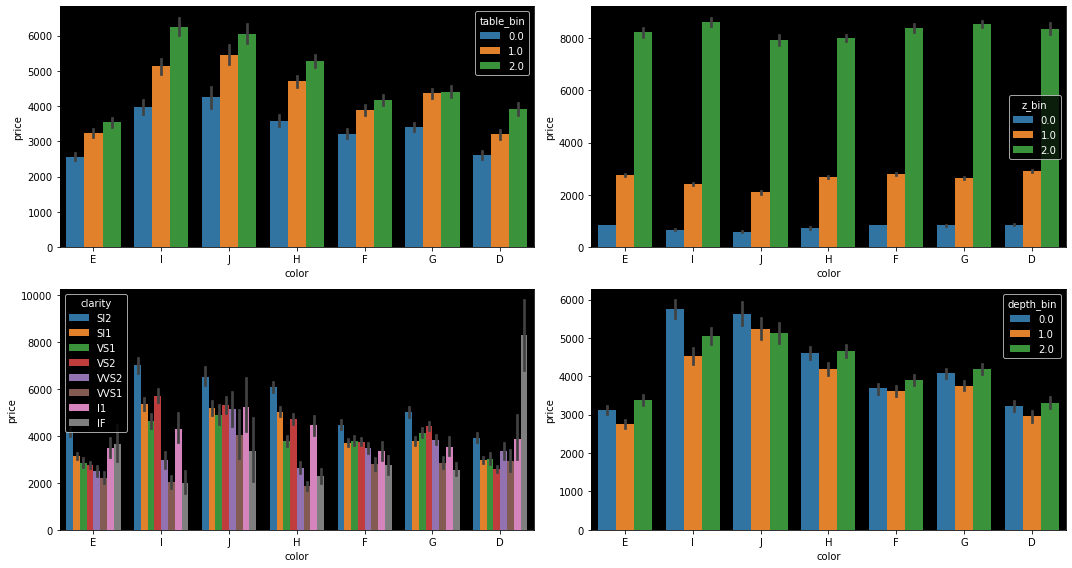

In [22]:
with sns.axes_style({'axes.facecolor':'black','text.color':'white'}):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    sns.barplot(df.color, df.price, hue=df.table_bin)
    plt.tight_layout()
    
    plt.subplot(2,2,2)
    sns.barplot(df.color, df.price, hue=df.z_bin)
    plt.tight_layout()
    
    plt.subplot(2,2,3)
    sns.barplot(df.color, df.price, hue=df.clarity)
    plt.tight_layout()
    
    plt.subplot(2,2,4)
    sns.barplot(df.color, df.price, hue=df.depth_bin)
    plt.tight_layout()
    
    plt.show()

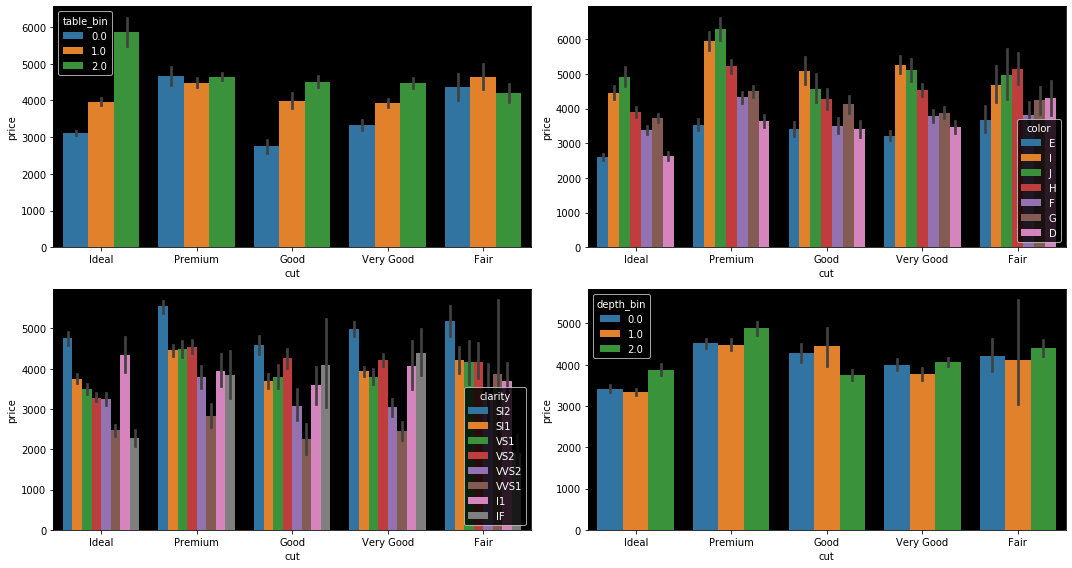

In [23]:
with sns.axes_style({'axes.facecolor':'black','text.color':'white'}):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    sns.barplot(df.cut, df.price, hue=df.table_bin)
    plt.tight_layout()
    
    plt.subplot(2,2,2)
    sns.barplot(df.cut, df.price, hue=df.color)
    plt.tight_layout()
    
    plt.subplot(2,2,3)
    sns.barplot(df.cut, df.price, hue=df.clarity)
    plt.tight_layout()
    
    plt.subplot(2,2,4)
    sns.barplot(df.cut, df.price, hue=df.depth_bin)
    plt.tight_layout()
    
    plt.show()

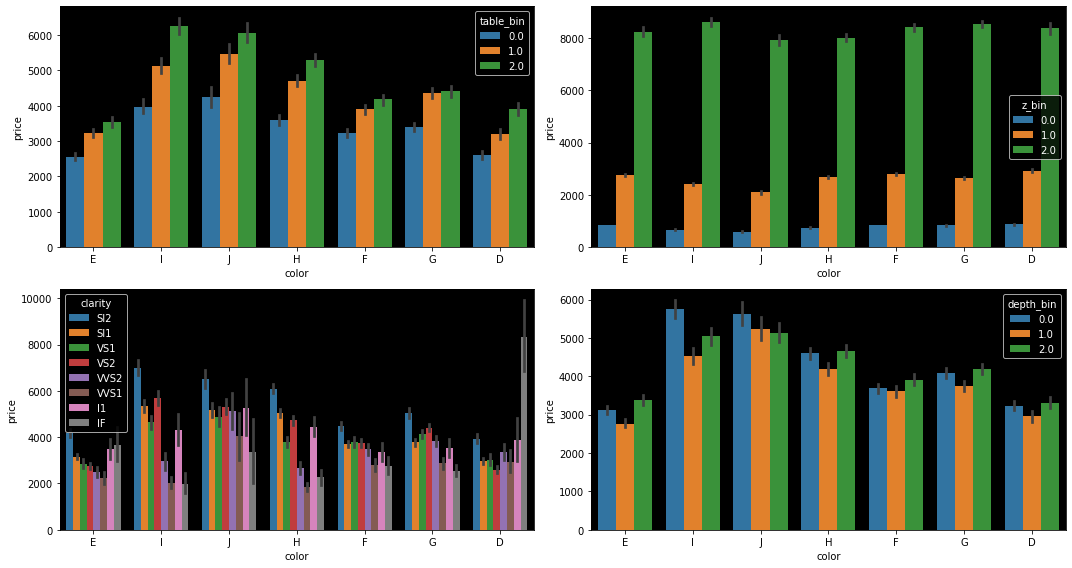

In [25]:
with sns.axes_style({'axes.facecolor':'black','text.color':'white'}):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    sns.barplot(df.color, df.price, hue=df.table_bin)
    plt.tight_layout()
    
    plt.subplot(2,2,2)
    sns.barplot(df.color, df.price, hue=df.z_bin)
    plt.tight_layout()
    
    plt.subplot(2,2,3)
    sns.barplot(df.color, df.price, hue=df.clarity)
    plt.tight_layout()
    
    plt.subplot(2,2,4)
    sns.barplot(df.color, df.price, hue=df.depth_bin)
    plt.tight_layout()
    
    plt.show()

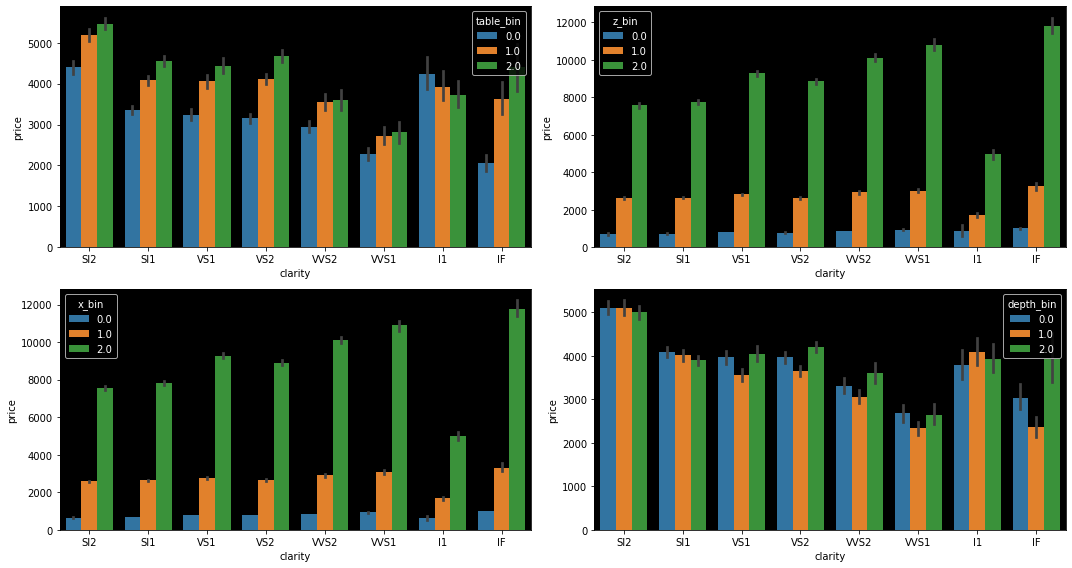

In [56]:
with sns.axes_style({'axes.facecolor':'black','text.color':'white'}):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    sns.barplot(df.clarity, df.price, hue=df.table_bin)
    plt.tight_layout()
    
    plt.subplot(2,2,2)
    sns.barplot(df.clarity, df.price, hue=df.z_bin)
    plt.tight_layout()
    
    plt.subplot(2,2,3)
    sns.barplot(df.clarity, df.price, hue=df.x_bin)
    plt.tight_layout()
    
    plt.subplot(2,2,4)
    sns.barplot(df.clarity, df.price, hue=df.depth_bin)
    plt.tight_layout()
    
    plt.show()

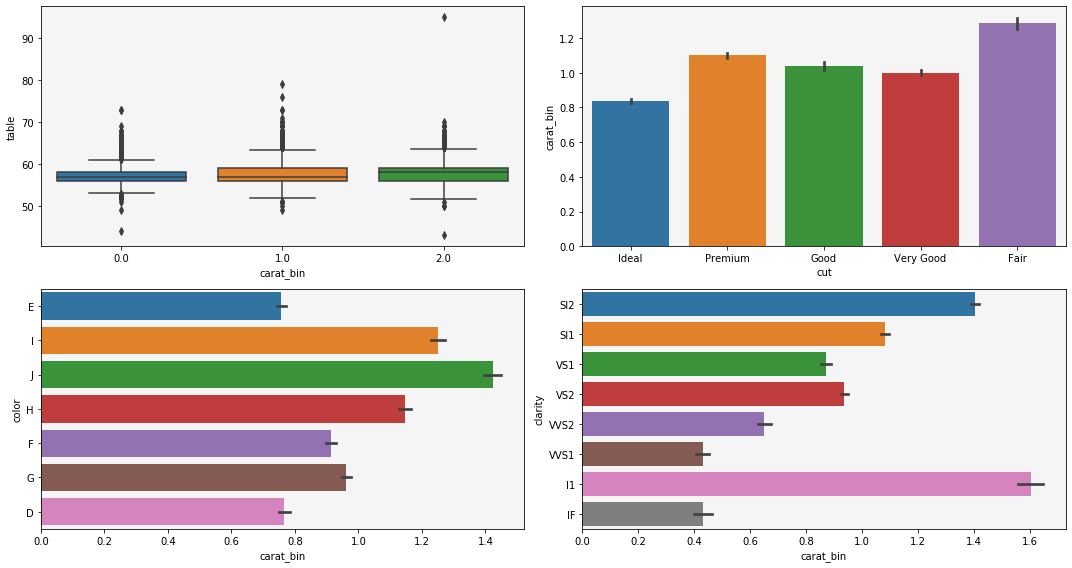

In [40]:
with sns.axes_style({'axes.facecolor':'whitesmoke','text.color':'blue'}):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    sns.boxplot(df.carat_bin, df.table)
    plt.tight_layout()
    
    plt.subplot(2,2,2)
    sns.barplot(df.cut, df.carat_bin)
    plt.tight_layout()
    
    plt.subplot(2,2,3)
    sns.barplot(df.carat_bin, df.color)
    plt.tight_layout()
    
    plt.subplot(2,2,4)
    sns.barplot(df.carat_bin, df.clarity)
    plt.tight_layout()
    
    plt.show()

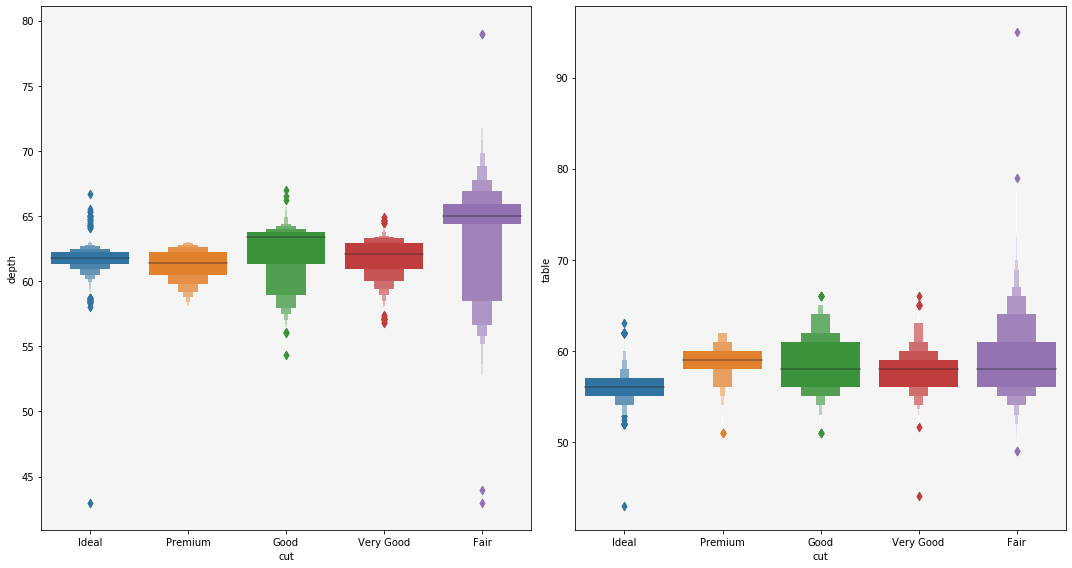

In [51]:
with sns.axes_style({'axes.facecolor':'whitesmoke','text.color':'blue'}):
    
    plt.figure(figsize=(15,8))

    plt.subplot(1,2,1)
    sns.boxenplot(df.cut, df.depth)
    plt.tight_layout()
    
    plt.subplot(1,2,2)
    sns.boxenplot(df.cut, df.table)
    plt.tight_layout()
    
    plt.show()

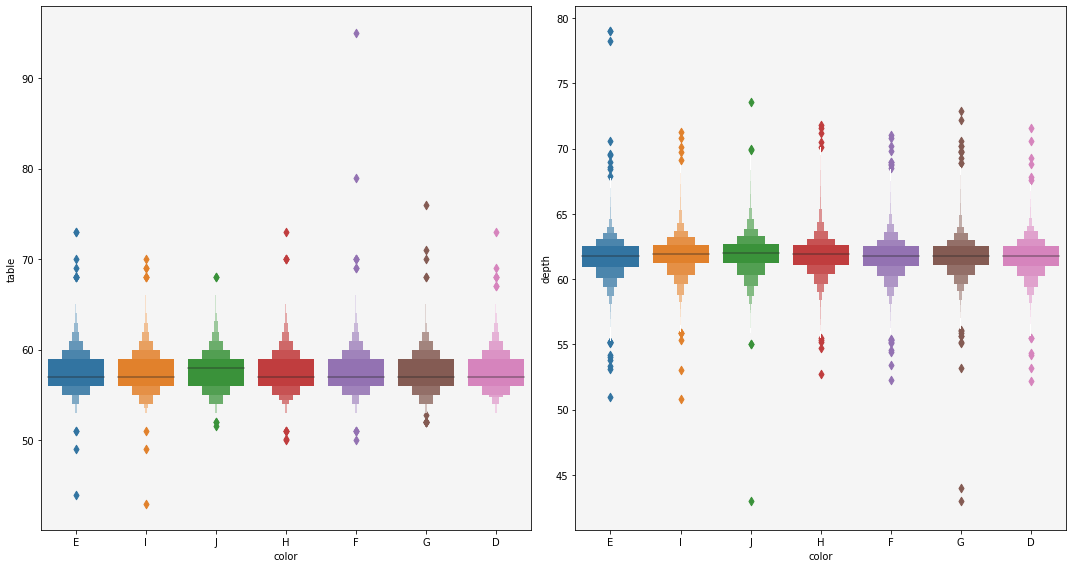

In [54]:
with sns.axes_style({'axes.facecolor':'whitesmoke','text.color':'blue'}):
    
    plt.figure(figsize=(15,8))

    plt.subplot(1,2,2)
    sns.boxenplot(df.color, df.depth)
    plt.tight_layout()
    
    plt.subplot(1,2,1)
    sns.boxenplot(df.color, df.table)
    plt.tight_layout()
    
    plt.show()

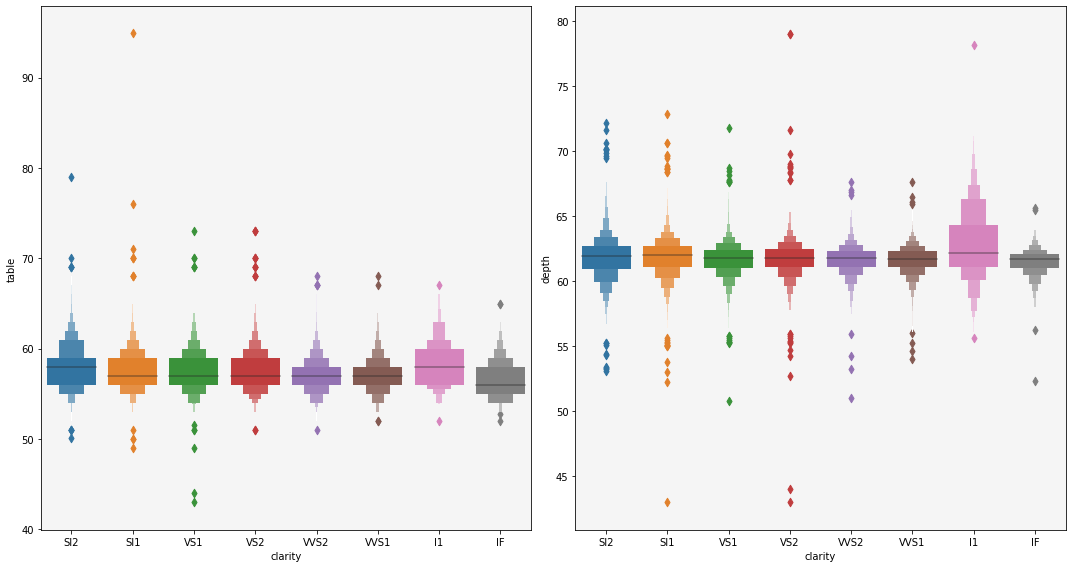

In [57]:
with sns.axes_style({'axes.facecolor':'whitesmoke','text.color':'blue'}):
    
    plt.figure(figsize=(15,8))

    plt.subplot(1,2,2)
    sns.boxenplot(df.clarity, df.depth)
    plt.tight_layout()
    
    plt.subplot(1,2,1)
    sns.boxenplot(df.clarity, df.table)
    plt.tight_layout()
    
    plt.show()